# Data

This notebook is an initial exploration of ASPECT data, including initial attempts to load data into *yt*. 

ASPECT output from: 
Data source: [DOI 10.17605/OSF.IO/TEJM4](https://osf.io/tejm4/)
Title: Edge-Driven Convection and Mantle Wind Models Beneath Madagascar
Authors: Tahiry Rajaonarison, Sarah Stamps, Stewart Fishwick, Sascha Brune, Anne Glerum, Jiashun Hu 

To run notebook: download and unpack, set environment variable "ASPECTdatadir" to the directory containing the unzipped directory



# Data Format


Standard ASPECT output is in the form of `.pvtu` and `.vtu` files. For a single time step on multiple processors, the files look like:

```
solution-00022.0000.vtu
solution-00022.0001.vtu
solution-00022.0002.vtu
solution-00022.0003.vtu
solution-00022.0004.vtu
solution-00022.0005.vtu
solution-00022.0006.vtu
solution-00022.0007.vtu
solution-00022.0008.vtu
solution-00022.0009.vtu
solution-00022.0010.vtu
solution-00022.0011.vtu
solution-00022.0012.vtu
solution-00022.0013.vtu
solution-00022.0014.vtu
solution-00022.0015.vtu
solution-00022.pvtu
```

The `.vtu` files are the output from each processor, which handles a different part of the unstructured mesh. The `.pvtu` file is a plain text xml file, e.g.: 

```
<?xml version="1.0"?>
<!--
#This file was generated by the deal.II library on 2018/9/13 at 18:17:01
-->
<VTKFile type="PUnstructuredGrid" version="0.1" byte_order="LittleEndian">
  <PUnstructuredGrid GhostLevel="0">
    <PPointData Scalars="scalars">
    <PDataArray type="Float64" Name="velocity" NumberOfComponents="3" format="ascii"/>
    <PDataArray type="Float64" Name="p" format="ascii"/>
    <PDataArray type="Float64" Name="T" format="ascii"/>
    <PDataArray type="Float64" Name="crust" format="ascii"/>
    <PDataArray type="Float64" Name="mantle_lithosphere" format="ascii"/>
    <PDataArray type="Float64" Name="viscosity" format="ascii"/>
    <PDataArray type="Float64" Name="density" format="ascii"/>
    <PDataArray type="Float64" Name="strain_rate" format="ascii"/>
    <PDataArray type="Float64" Name="velocity_inclination" format="ascii"/>
    </PPointData>
    <PPoints>
      <PDataArray type="Float64" NumberOfComponents="3"/>
    </PPoints>
    <Piece Source="solution-00022.0000.vtu"/>
    <Piece Source="solution-00022.0001.vtu"/>
    <Piece Source="solution-00022.0002.vtu"/>
    <Piece Source="solution-00022.0003.vtu"/>
    <Piece Source="solution-00022.0004.vtu"/>
    <Piece Source="solution-00022.0005.vtu"/>
    <Piece Source="solution-00022.0006.vtu"/>
    <Piece Source="solution-00022.0007.vtu"/>
    <Piece Source="solution-00022.0008.vtu"/>
    <Piece Source="solution-00022.0009.vtu"/>
    <Piece Source="solution-00022.0010.vtu"/>
    <Piece Source="solution-00022.0011.vtu"/>
    <Piece Source="solution-00022.0012.vtu"/>
    <Piece Source="solution-00022.0013.vtu"/>
    <Piece Source="solution-00022.0014.vtu"/>
    <Piece Source="solution-00022.0015.vtu"/>
  </PUnstructuredGrid>
</VTKFile>
```

The `PDataArray` entries describe the avaiable fields, the `Piece Source` entries point to the individual processor files that comprise the full mesh.

# Reference Plots with *visit*
*visit* (https://wci.llnl.gov/simulation/computer-codes/visit) is commonly used by ASPECT users, so here are some screen shots of loading the above data to get an initial sense of what is there.


## a single `.vtu` file 

For example, here's a visualization of the mesh from a single `.vtu` file loaded using *visit*

![partialMesh](resources/visitScreenshot_vtu.png)


## loading the full `.pvtu` file 

In *visit*, when you load the `.pvtu` file it collects the pieces from all the processors : 

![fullMesh](resources/visitScreenshot_fullMesh.png)


## rendering a field variable from the full `.pvtu` file 

And here is an example of visualizing the temperature field: 

![visitTemp](resources/visitScreenshot_T.png)

# Exploring ASPECT output with *meshio* and *xmltodict*

In [1]:
import os, yt, numpy as np
import xmltodict, meshio 

%matplotlib notebook
import matplotlib.pyplot as plt 

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

In [2]:
DataDir=os.path.join(os.environ.get('ASPECTdatadir','../'),'edc_driven_convection_madagascar',
                     'edc_driven_convection_madagascar','solution')

In [3]:
pFile=os.path.join(DataDir,'solution-00005.pvtu')
if os.path.isfile(pFile) is False:
    print("data file not found")
    
# parse the multiprocessory summary file
with open(pFile) as data:
    pXML = xmltodict.parse(data.read())
    
# pull out a single processor .vtu file 
sFile=pXML['VTKFile']['PUnstructuredGrid']['Piece'][0]['@Source']
sFile=os.path.join(DataDir,sFile)

# *meshio*: loading a single .vtu file


In [4]:
sP=meshio.read(sFile)

In [5]:
dir(sP)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'cell_data',
 'cell_data_dict',
 'cell_sets',
 'cell_sets_dict',
 'cells',
 'cells_dict',
 'field_data',
 'get_cell_data',
 'get_cells_type',
 'gmsh_periodic',
 'info',
 'int_data_to_sets',
 'point_data',
 'point_sets',
 'points',
 'prune',
 'read',
 'sets_to_int_data',
 'write']

**connectivity info is in cells:**

In [6]:
len(sP.cells)

8

In [7]:
# cells are further subdivided 
sP.cells[0]

CellBlock(type='hexahedron', data=array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32))

In [8]:
sP.cells[0].data

array([[    0,     1,     3, ...,     5,     7,     6],
       [    8,     9,    11, ...,    13,    15,    14],
       [   16,    17,    19, ...,    21,    23,    22],
       ...,
       [17448, 17449, 17451, ..., 17453, 17455, 17454],
       [17456, 17457, 17459, ..., 17461, 17463, 17462],
       [17464, 17465, 17467, ..., 17469, 17471, 17470]], dtype=int32)

In [9]:
sP.cells[0].data.shape

(2184, 8)

In [10]:
# a single hexahedron voxel connectivity
sP.cells[0].data[0]

array([0, 1, 3, 2, 4, 5, 7, 6], dtype=int32)

In [11]:
# coordinate info in points
sP.points

array([[ 4251470.30616899,  2976911.55685427, -2759618.16365957],
       [ 4256644.64687846,  2980534.6692243 , -2762976.81456819],
       [ 4235170.61707754,  3000055.33712502, -2759618.16365957],
       ...,
       [ 4034124.13830093,  4450970.08761739, -1317999.8246718 ],
       [ 4005123.50922364,  4467703.30644549, -1316466.6335507 ],
       [ 4009787.97974399,  4472906.50937258, -1317999.8246718 ]])

In [12]:
sP.points.shape

(139840, 3)

In [13]:
# actual field data is in point_data
sP.point_data

{'velocity': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-6.36602708e-05, -4.45754013e-05,  4.13217131e-05],
        [-2.49424018e-04,  3.52111267e-04,  0.00000000e+00],
        ...,
        [ 1.28487940e-03,  4.28326806e-04, -1.42322489e-04],
        [ 1.25289906e-03,  6.92421920e-04, -1.30072774e-04],
        [ 1.24936993e-03,  5.90830517e-04, -1.02484053e-04]]),
 'p': array([1.40637481e+10, 1.38452081e+10, 1.40637164e+10, ...,
        5.68988006e+09, 5.91218483e+09, 5.68990310e+09]),
 'T': array([1840.6965332 , 1837.11938477, 1842.52648926, ..., 1727.26367188,
        1731.66894531, 1728.08190918]),
 'crust': array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -9.98153837e-21, -2.04027511e-21, -1.05621820e-20]),
 'mantle_lithosphere': array([-2.03886474e-38, -6.02088624e-38,  9.18995635e-39, ...,
         7.86181762e-14,  2.24783113e-14,  1.12801885e-13]),
 'viscosity': array([6.35352495e+20, 6.19644573e+20, 6.70766269e+20, ...,
        1.

In [14]:
# data at nodes is in coordinate order
sP.point_data['T'].shape

(139840,)

In [15]:
# pull some values for a node set
print(sP.point_data.keys())
sampleNodes=sP.cells[0].data[0]

print(sampleNodes)

print("sample T:")
print(sP.point_data['T'][sampleNodes])

print("\nsample xyz:")
print(sP.points[sampleNodes])

dict_keys(['velocity', 'p', 'T', 'crust', 'mantle_lithosphere', 'viscosity', 'density', 'strain_rate', 'velocity_inclination'])
[0 1 3 2 4 5 7 6]
sample T:
[1840.6965332  1837.11938477 1838.94946289 1842.52648926 1841.03149414
 1837.45446777 1839.43432617 1842.80651855]

sample xyz:
[[ 4251470.30616899  2976911.55685427 -2759618.16365957]
 [ 4256644.64687846  2980534.6692243  -2762976.81456819]
 [ 4240325.11991004  3003706.61711608 -2762976.81456819]
 [ 4235170.61707754  3000055.33712502 -2759618.16365957]
 [ 4263736.37976591  2985500.35405107 -2731269.72497969]
 [ 4268925.64915637  2989133.91959607 -2734593.87382908]
 [ 4252559.03811952  3012372.72172832 -2734593.87382908]
 [ 4247389.663841    3008710.90729485 -2731269.72497969]]


[0 1 3 2 4 5 7 6]
[1840.6965332  1837.11938477 1838.94946289 1842.52648926 1841.03149414
 1837.45446777 1839.43432617 1842.80651855]
[[ 4251470.30616899  2976911.55685427 -2759618.16365957]
 [ 4256644.64687846  2980534.6692243  -2762976.81456819]
 [ 4240325.11991004  3003706.61711608 -2762976.81456819]
 [ 4235170.61707754  3000055.33712502 -2759618.16365957]
 [ 4263736.37976591  2985500.35405107 -2731269.72497969]
 [ 4268925.64915637  2989133.91959607 -2734593.87382908]
 [ 4252559.03811952  3012372.72172832 -2734593.87382908]
 [ 4247389.663841    3008710.90729485 -2731269.72497969]]


<IPython.core.display.Javascript object>


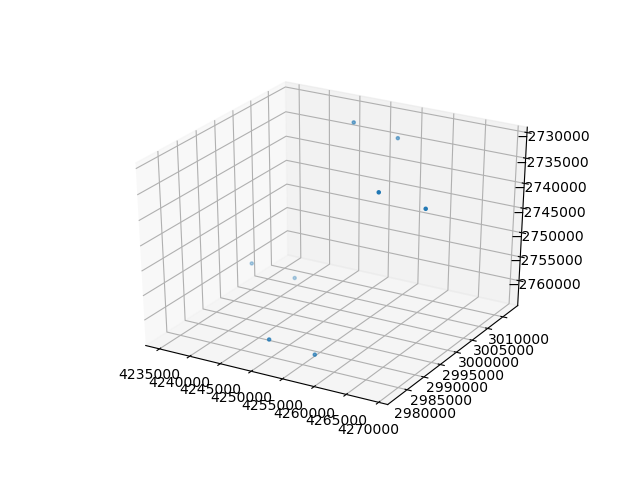

<IPython.core.display.Javascript object>


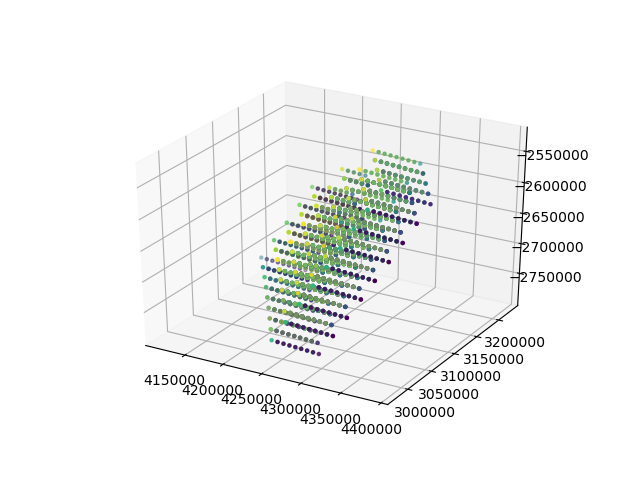

In [16]:
# some manual plotting of the mesh 

sampleNodes=sP.cells[0].data[0] # a single element's vertices 
Tvals=sP.point_data['T'][sampleNodes] # field values at those vertices 
crds=sP.points[sampleNodes] # coordinates of those vertices 
X=crds[:,0]
Y=crds[:,1]
Z=crds[:,2]

print(sampleNodes)
print(Tvals)
print(crds)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X,Y,Z,marker='.')
plt.show()

# plotting many elements in a cell block 
sampleNodes=sP.cells[0].data[0:400]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for nds in sampleNodes:
    crds=sP.points[nds]
    X=crds[:,0]
    Y=crds[:,1]
    Z=crds[:,2]
    Tvals=sP.point_data['T'][nds]
    ax.scatter(X,Y,Z,marker='.',c=Tvals)
    
plt.show()    

<IPython.core.display.Javascript object>


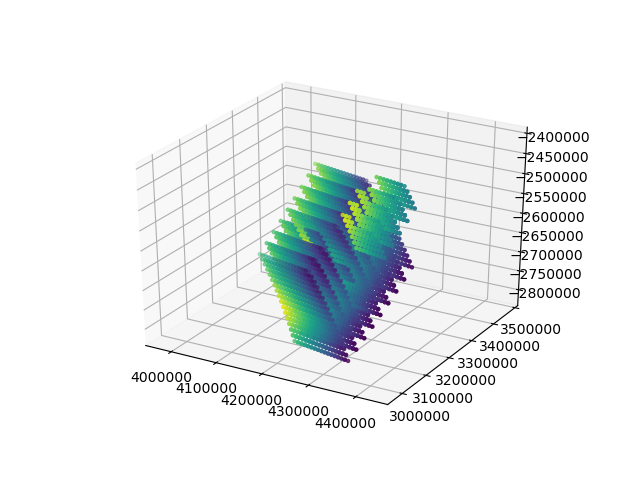

In [17]:
# same as above, but in a way yt will like 

# connectivity array for a single cell bock, 0: 
connectivity=sP.cells[0].data

# pull out the coords for each vertex: 
coords=sP.points[connectivity.min():connectivity.max()+1]

# pull out the data for each vertex then reshape to match connectivity array 
pt_data=sP.point_data['T'][connectivity.ravel()]
pt_data=np.reshape(pt_data,connectivity.shape)
node_data = {("connect1", "T") : pt_data.astype("f8")}

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X=coords[:,0]
Y=coords[:,1]
Z=coords[:,2]
Tvals=node_data[("connect1", "T")].ravel()
ax.scatter(X,Y,Z,marker='.',c=Tvals)    
plt.show()    



## loading a single cell block into *yt*

`yt.load_unstructured_mesh(connectivity,coordinates,node_data={}`

from `load_unstructured_mesh` docstring: 
* connectivity (list of array_like or array_like) – This should either be a single 2D array or list of 2D arrays. If this is a list, each element in the list corresponds to the connectivity information for a distinct mesh. Each array can have different connectivity length and should be of shape (N,M) where N is the number of elements and M is the number of vertices per element.
* coordinates (array_like) – The 3D coordinates of mesh vertices. This should be of size (L, D) where L is the number of vertices and D is the number of coordinates per vertex (the spatial dimensions of the dataset). Currently this must be either 2 or 3. When loading more than one mesh, the data for each mesh should be concatenated into a single coordinates array.
* node_data (dict or list of dicts) – For a single mesh, a dict mapping field names to 2D numpy arrays, representing data defined at element vertices. For multiple meshes, this must be a list of dicts. Note that these are not the values as a function of the coordinates, but of the connectivity. Their shape should be the same as the connectivity. This means that if the data is in the shape of the coordinates, you may need to reshape them using the connectivity array as an index.

In [18]:
print("connectivity shape and size")
print(connectivity.shape)
print(connectivity.size)

print("coordinates shape")
print(coords.shape)

print("node data shape")
print(node_data[("connect1", 'T')].shape)

# now load it in 
ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords.astype("f8"),
    node_data = node_data
)

yt : [INFO     ] 2020-06-23 14:33:28,187 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 14:33:28,187 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 14:33:28,187 Parameters: domain_left_edge          = [ 3578253.51624149  2679220.40116884 -3094692.23601728]
yt : [INFO     ] 2020-06-23 14:33:28,188 Parameters: domain_right_edge         = [ 4876256.0411066   3824405.37329946 -2172835.51573034]
yt : [INFO     ] 2020-06-23 14:33:28,189 Parameters: cosmological_simulation   = 0.0


connectivity shape and size
(2184, 8)
17472
coordinates shape
(17472, 3)
node data shape
(2184, 8)


yt : [INFO     ] 2020-06-23 14:33:28,277 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 14:33:28,278 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 14:33:28,278 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 14:33:28,279 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 14:33:28,279 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800


[4227254.778674045 code_length, 3251812.8872341514 code_length]
center-window



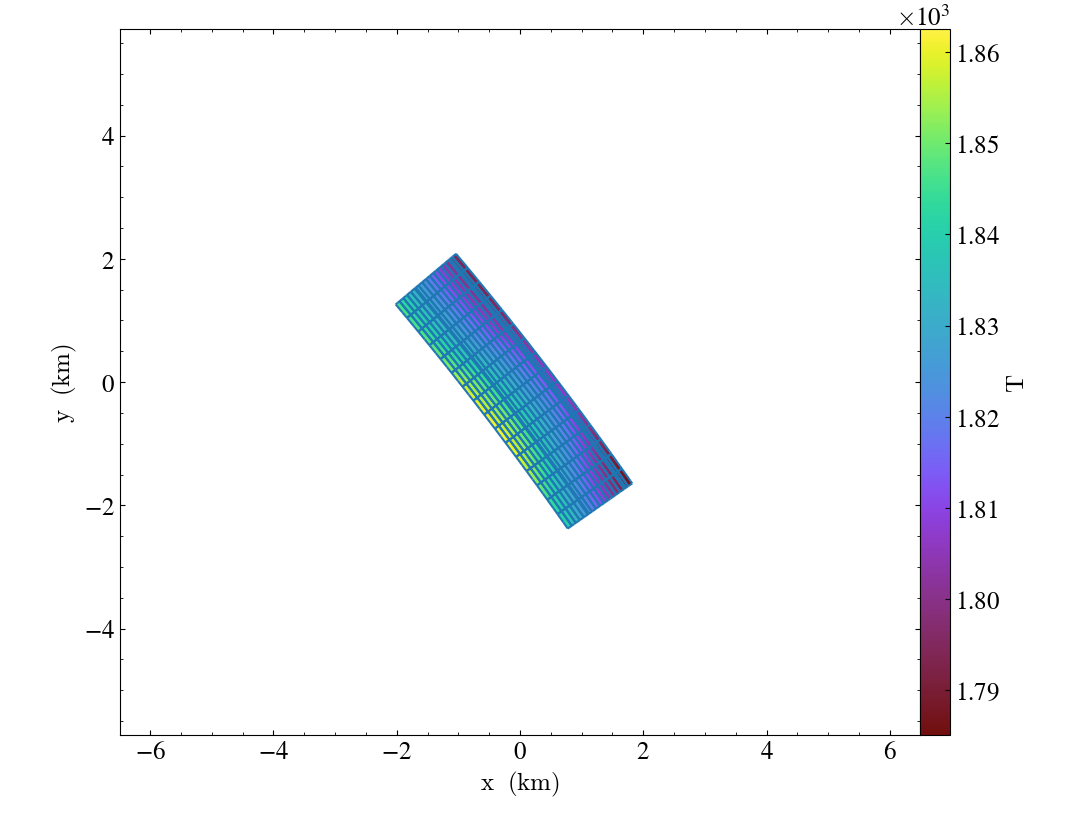

In [19]:
slc=yt.SlicePlot(ds, "z", ("connect1", "T")).annotate_mesh_lines()
slc.set_log("T",False)
print(slc.center)
print(slc.origin)
slc.show()

yt : [INFO     ] 2020-06-23 14:33:28,803 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 14:33:28,803 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 14:33:28,804 xlim = 3578253.516241 4876256.041107
yt : [INFO     ] 2020-06-23 14:33:28,804 ylim = 2679220.401169 3824405.373299
yt : [INFO     ] 2020-06-23 14:33:28,805 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



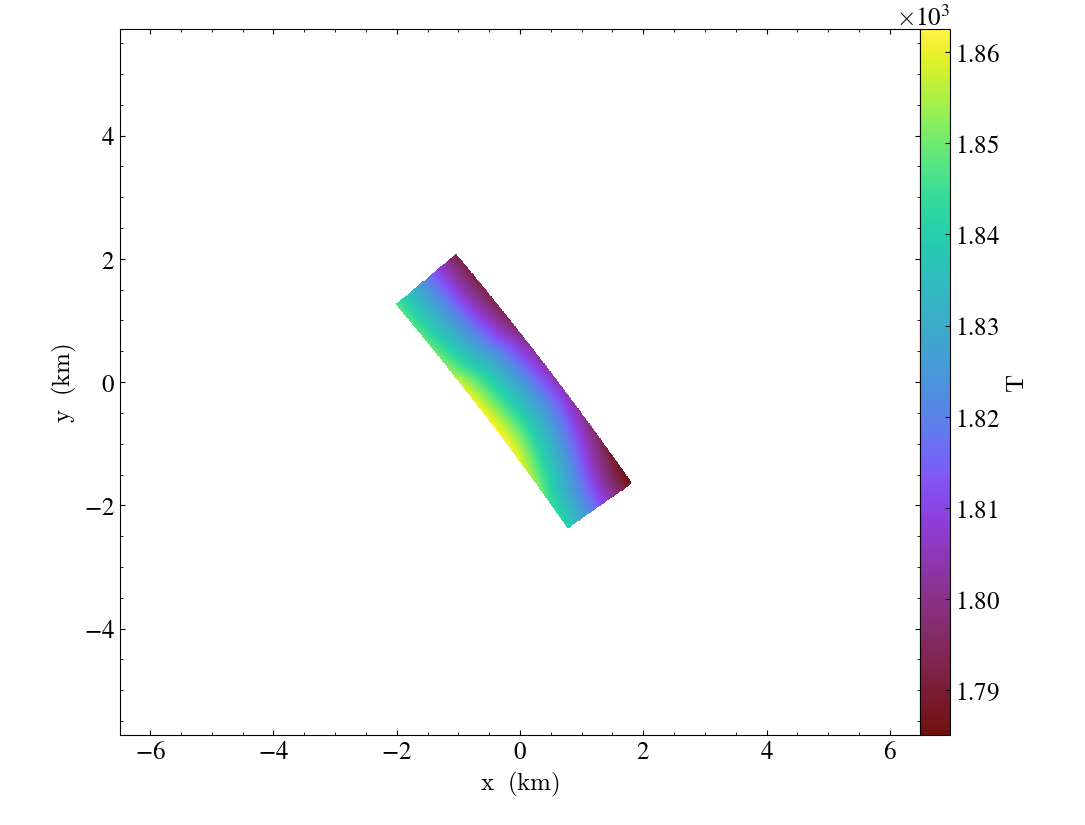

In [20]:
slc=yt.SlicePlot(ds, "z", ("connect1", "T"))
slc.set_log("T",False)
slc.show()


## load full single vtu file (still one processor's data)

In [21]:
try:
    nCells=len(sP.cells)
except: 
    sP=meshio.read(sFile)
    nCells=len(sP.cells)

# let's load a single cell block and field into yt
print("there are {nCells} CellBlocks in this vtu".format(nCells=nCells))

there are 8 CellBlocks in this vtu


In [22]:
# cell block cell data does not contain duplicates
a,c=np.unique(sP.cells[0].data,return_counts=True)
print(len(c[c>1]))

# because the point data is repeated 
a,c=np.unique(sP.points,return_counts=True)
print(len(c[c>1]))


0
51417


In [23]:
# flatten the cell blocks into single connectivity
connectivity=[]
for cB in sP.cells:         
    connectivity.extend(cB.data)
connectivity=np.array(connectivity)

# coords are already global 
coords=sP.points

# pull out point_data and reshape to same as connectivity 
node_data = {("connect1", "T") : np.reshape(sP.point_data['T'],connectivity.shape).astype("f8")} # breaks for vectors with components

print("connectivity shape and size")
print(connectivity.shape)
print(connectivity.size)

print("coordinates shape")
print(coords.shape)

print("node data shape")
print(node_data[("connect1", 'T')].shape)


ds = yt.load_unstructured_mesh(
    connectivity.astype("i8"),
    coords.astype("f8"),
    node_data = node_data 
)    


yt : [INFO     ] 2020-06-23 14:33:29,222 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 14:33:29,223 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 14:33:29,223 Parameters: domain_left_edge          = [ 2942087.77597532  2679220.40116884 -3242472.87599667]
yt : [INFO     ] 2020-06-23 14:33:29,223 Parameters: domain_right_edge         = [ 5160369.30842531  5562836.63343369 -1001632.35358264]
yt : [INFO     ] 2020-06-23 14:33:29,224 Parameters: cosmological_simulation   = 0.0


connectivity shape and size
(17480, 8)
139840
coordinates shape
(139840, 3)
node data shape
(17480, 8)


In [24]:
ds.dimensionality

3

yt : [INFO     ] 2020-06-23 14:33:29,308 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-06-23 14:33:29,308 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 14:33:29,310 xlim = 2942087.775975 5160369.308425
yt : [INFO     ] 2020-06-23 14:33:29,310 ylim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 14:33:29,311 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800
/home/chavlin/miniconda3/envs/sandbox/lib/python3.6/site-packages/yt/visualization/plot_window.py:907: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) == np.nanmin(image):
/home/chavlin/miniconda3/envs/sandbox/lib/python3.6/site-packages/yt/visualization/plot_window.py:910: RuntimeWarning: All-NaN axis encountered
  elif np.nanmax(image) <= 0:
yt : [WARNING  ] 2020-06-23 14:33:29,325 Plot image for field ('connect1', 'T') is filled with NaNs.
yt : [WARNING  ] 2020-06-23 14:33:29,325 Switching to linear colorbar scaling.


[4051228.5422003176 code_length, 4121028.5173012675 code_length]



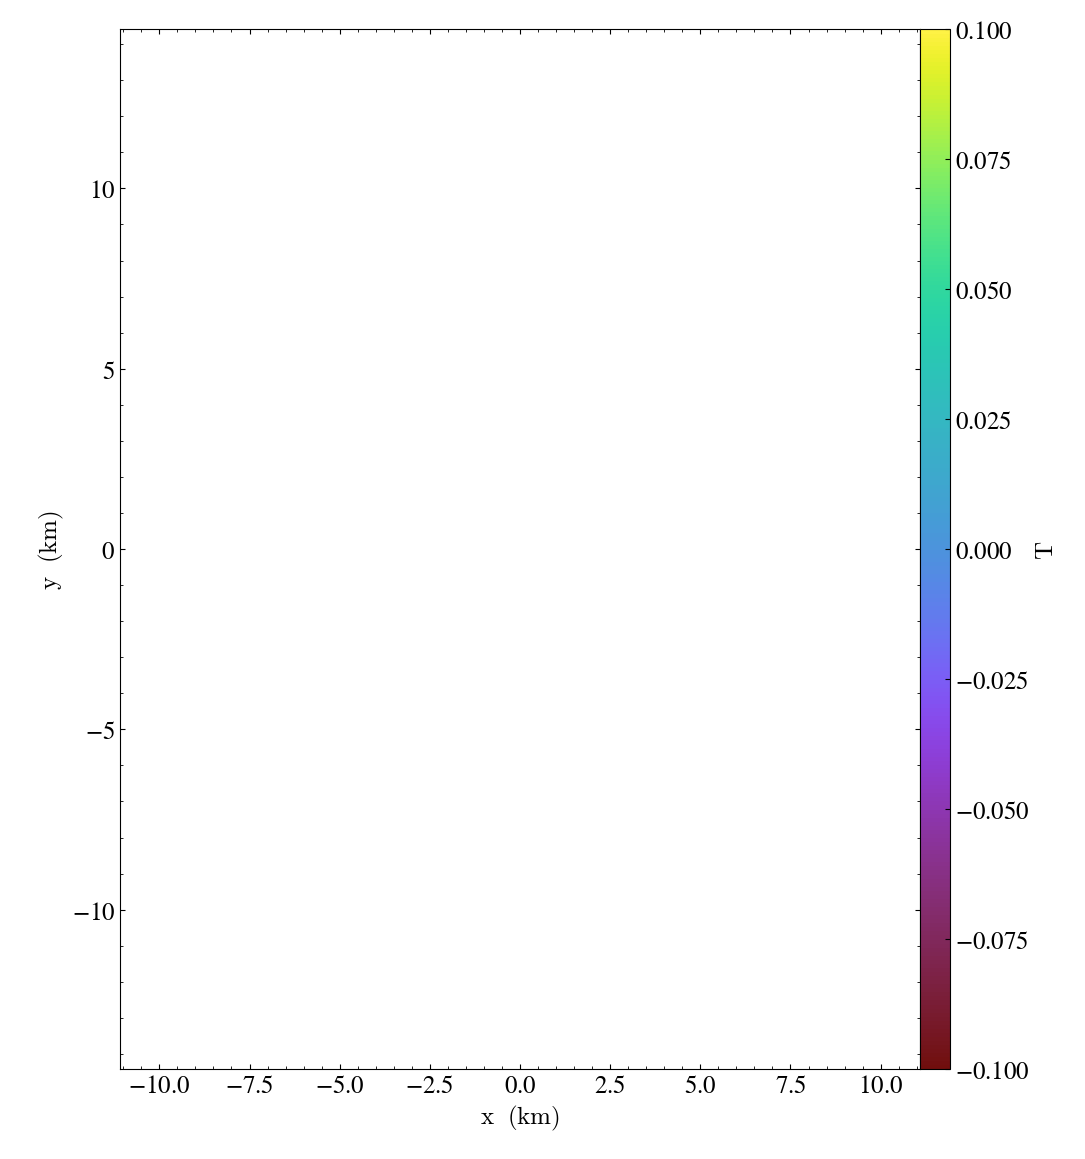

In [25]:
p=yt.SlicePlot(ds, axis="z", fields=("connect1", "T"))
print(p.center)
p.set_log("T",False)
p.show()


yt : [INFO     ] 2020-06-23 14:33:29,696 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 14:33:29,696 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-06-23 14:33:29,697 xlim = 2679220.401169 5562836.633434
yt : [INFO     ] 2020-06-23 14:33:29,698 ylim = -3242472.875997 -1001632.353583
yt : [INFO     ] 2020-06-23 14:33:29,699 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



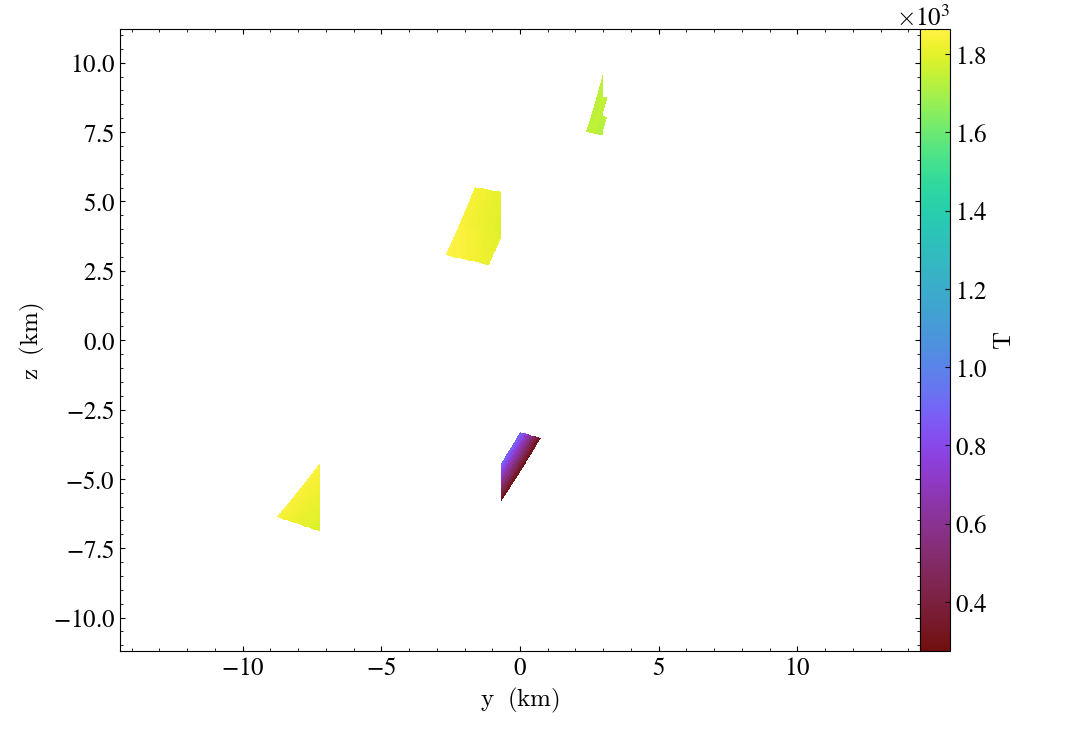

In [26]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

**The above doesn't look good -- but** a single `.vtu` file is not guaranteed to have continuous sequences of the total mesh, so the slicing may be sampling regions with no data? Need to load all the data to confirm, but first: 

## comparison of vtu files:

do indeces reset across files? 



In [27]:
file_1=os.path.join(DataDir,pXML['VTKFile']['PUnstructuredGrid']['Piece'][0]['@Source'])
file_2=os.path.join(DataDir,pXML['VTKFile']['PUnstructuredGrid']['Piece'][1]['@Source'])

sP_1=meshio.read(file_1)
sP_2=meshio.read(file_2)

def flattenCon(sPin):
    connectivity=[]
    for cB in sPin.cells:     
        connectivity.extend(cB.data)
    return np.array(connectivity)
    
con_1=flattenCon(sP_1)
con_2=flattenCon(sP_2)

print(con_1)
print(con_2)

[[     0      1      3 ...      5      7      6]
 [     8      9     11 ...     13     15     14]
 [    16     17     19 ...     21     23     22]
 ...
 [139880 139881 139883 ... 139885 139887 139886]
 [139888 139889 139891 ... 139893 139895 139894]
 [139896 139897 139899 ... 139901 139903 139902]]
[[     0      1      3 ...      5      7      6]
 [     8      9     11 ...     13     15     14]
 [    16     17     19 ...     21     23     22]
 ...
 [139816 139817 139819 ... 139821 139823 139822]
 [139824 139825 139827 ... 139829 139831 139830]
 [139832 139833 139835 ... 139837 139839 139838]]


**So need to offset connectivity indeces!!!!!!!!**

## load all the vtu files

The main difference between the *meshio* output and what `yt.load_unstructured_mesh()` expects is that *meshio* loads the field data as a 1D array the same length as the coordinate array, while `yt.load_unstructured_mesh()` expects `node_data` to be element-ordered. So for each `.vtu` file, we need to reshape that data. 

In [28]:
def loadPiece(srcFi,connectivity_offset=0): 
    sP=meshio.read(srcFi)
    
    # coords and node_data are already global, ordered, minor adjustments:
    coords=sP.points

    # flatten the cell blocks into single connectivity
    connectivity=[]
    for cB in sP.cells:     
        connectivity.extend(cB.data)
    connectivity=np.array(connectivity)+connectivity_offset

    FldData=np.reshape(sP.point_data['T'],connectivity.shape)
    node_data = {("connect1", "T") : FldData} # breaks for vectors with components
    
    return [connectivity,coords,node_data]

coordlist=[]
conlist=[]
nodeDict={("connect1","T"):[]}
minz=[]
maxz=[]
previous_max_con=0
for src in pXML['VTKFile']['PUnstructuredGrid']['Piece']:
    srcFi=os.path.join(DataDir,src['@Source'])
    print(srcFi)
    [con,coord,node_d]=loadPiece(srcFi,previous_max_con+1)
    previous_max_con=con.max() 
    
    coordlist.extend(coord)
    minz.append(np.array(coord[2]).min())
    maxz.append(np.array(coord[2]).max())

    initshape=np.array(conlist).shape
    conlist.extend(con)
    nodeDict[("connect1","T")].extend(node_d[("connect1","T")].tolist())
    
#     print(np.array(coordlist).shape)
#     print(np.array(conlist).shape)
#     print(np.array(nodeDict[("connect1","T")]).shape)

nodeDict[("connect1","T")]=np.array(nodeDict[("connect1","T")])
conlist=np.array(conlist)
coordlist=np.array(coordlist)
  
    

/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0000.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0001.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0002.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0003.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0004.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0005.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_convection_madagascar/edc_driven_convection_madagascar/solution/solution-00005.0006.vtu
/home/chavlin/hdd/data/yt_dev/aspect/edc_driven_

(262144, 8)
2097152
(2097152, 3)
(262144, 8)
2097152


<IPython.core.display.Javascript object>


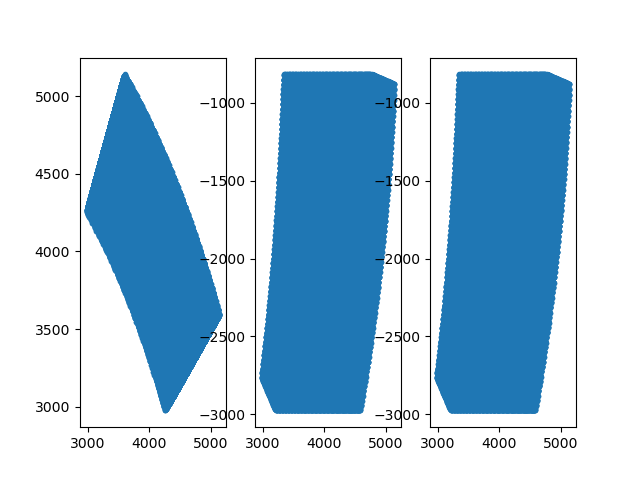

In [29]:
# just to confirm, let's check some shapes and make some matplotlib plots of the coordinates: 

print(conlist.shape)
print(conlist.size)
print(coordlist.shape)
print(nodeDict[("connect1","T")].shape)
print(nodeDict[("connect1","T")].size)

coordlist=coordlist/1000. # its in cm.... 
f=plt.figure()
plt.subplot(1,3,1)
plt.plot(coordlist[:,0],coordlist[:,1],'.')

plt.subplot(1,3,2)
plt.plot(coordlist[:,0],coordlist[:,2],'.')

plt.subplot(1,3,3)
plt.plot(coordlist[:,1],coordlist[:,2],'.')
plt.show()



Looks like the full mesh is being loaded and assembled correctly (again, not sure about units here). 

**so let's load it into** *yt*

In [30]:

ds = yt.load_unstructured_mesh(
    conlist.astype("i8"),
    coordlist.astype("f8"),
    node_data = nodeDict 
)  




yt : [INFO     ] 2020-06-23 14:33:33,014 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-06-23 14:33:33,015 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2020-06-23 14:33:33,015 Parameters: domain_left_edge          = [ 2679.22040117  2679.22040117 -3272.02900399]
yt : [INFO     ] 2020-06-23 14:33:33,015 Parameters: domain_right_edge         = [5653.60091489 5653.60091489 -736.27069874]
yt : [INFO     ] 2020-06-23 14:33:33,016 Parameters: cosmological_simulation   = 0.0


yt : [INFO     ] 2020-06-23 14:33:33,096 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:33,097 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-06-23 14:33:33,097 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:33,098 ylim = -3272.029004 -736.270699
yt : [INFO     ] 2020-06-23 14:33:33,098 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



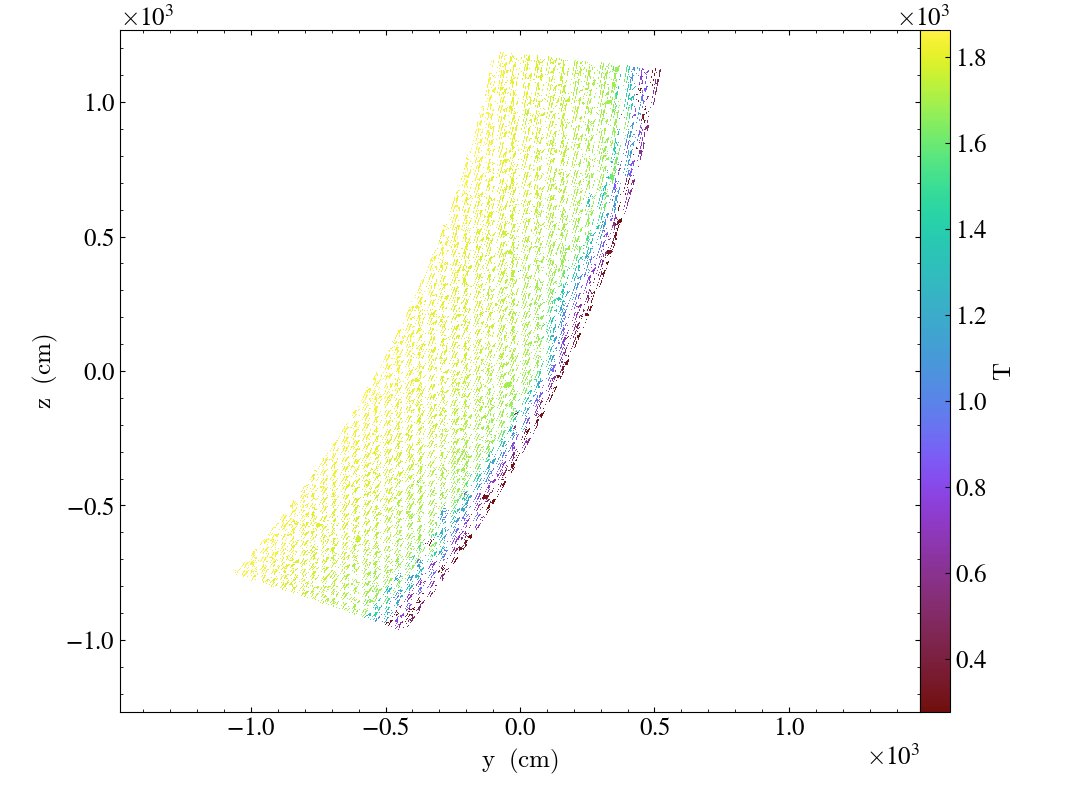

In [31]:
p=yt.SlicePlot(ds, "x", ("connect1", "T"))
p.set_log("T",False)
p.show()

yt : [INFO     ] 2020-06-23 14:33:42,743 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:42,744 ylim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:42,744 xlim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:42,745 ylim = 2679.220401 5653.600915
yt : [INFO     ] 2020-06-23 14:33:42,746 Making a fixed resolution buffer of (('connect1', 'T')) 800 by 800



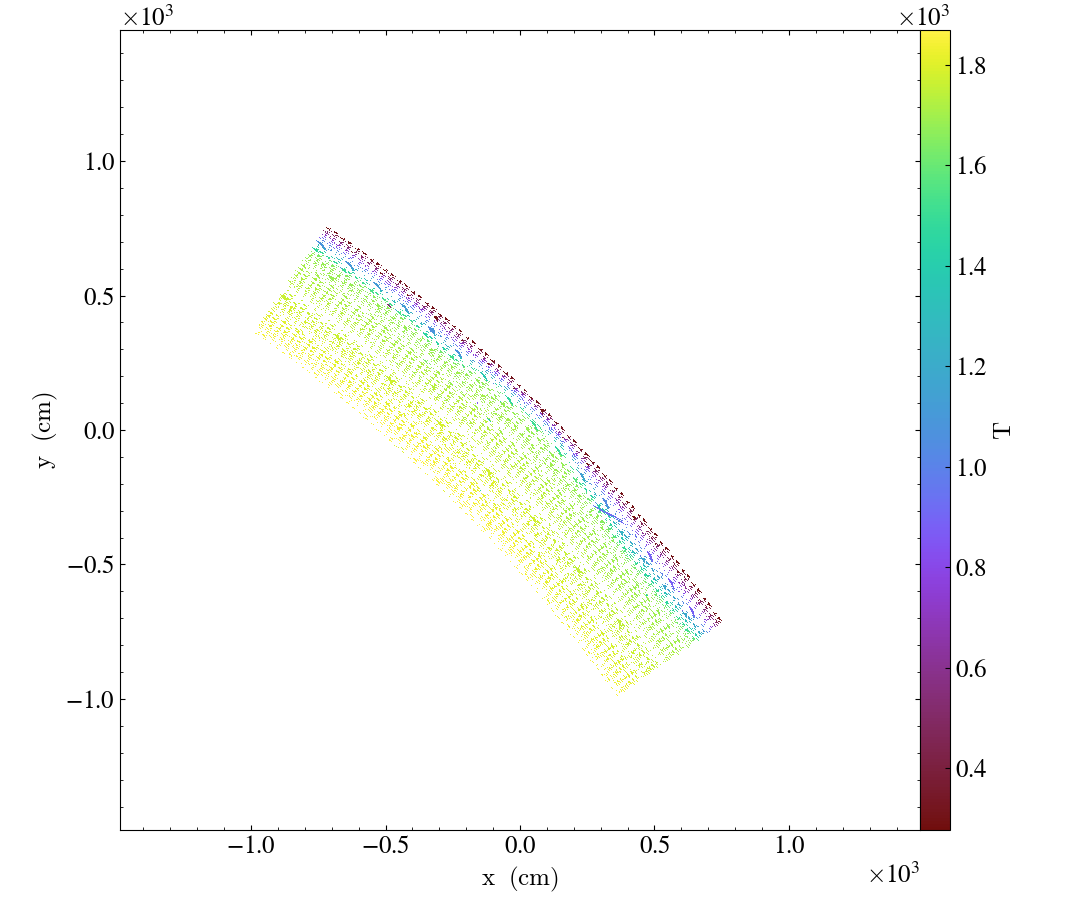

In [32]:
p=yt.SlicePlot(ds, "z", ("connect1", "T"))
p.set_log("T",False)
p.show()

SEEMS TO WORK???